In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### **Catagorization**

Text(0.5, 1.0, 'After')

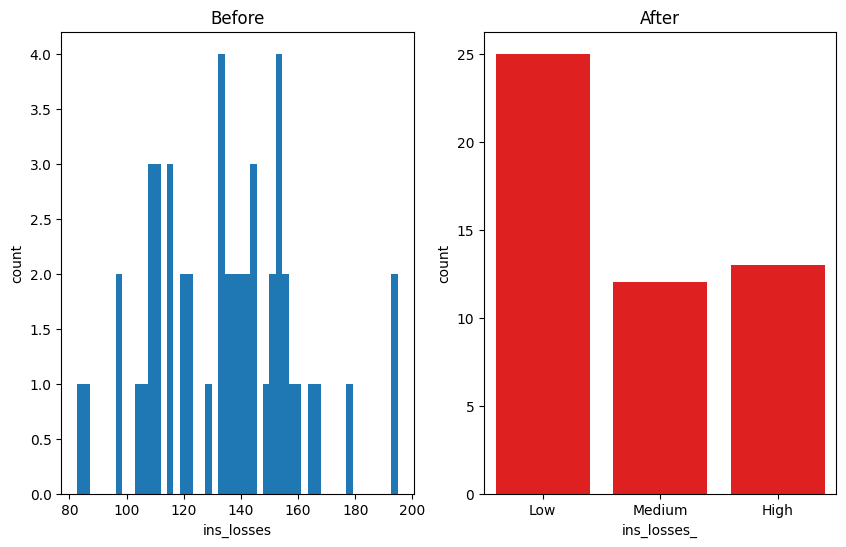

In [38]:
# edges based on which we will cut the ins_losses col
edges = [
    data['ins_losses'].min(),
    data['ins_losses'].describe().loc['50%'],
    data['ins_losses'].describe().loc['75%'],
    data['ins_losses'].max()
]

# labels for the bins
labels = ['Low', 'Medium','High']

# cutting
data['ins_losses_'] = pd.cut(
    data['ins_losses'],
    bins=edges,
    labels=labels,
)

# what it will do -
# if the value of ins_losses is less than the first edge, it will be categorized as 'Low' (edge 0 to edge 1)
# if the value of ins_losses is less than the second edge, it will be categorized as 'Medium' (edge 1 to edge 2)
# otherwise, it will be categorized as 'High' (edge 2 to edge 3)



# visualise
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
data['ins_losses'].plot.hist(bins=50)
plt.title('Before')
plt.xlabel('ins_losses')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='ins_losses_', color='red')
plt.title('After')

### **Bin Discretization**

Text(0.5, 1.0, 'After')

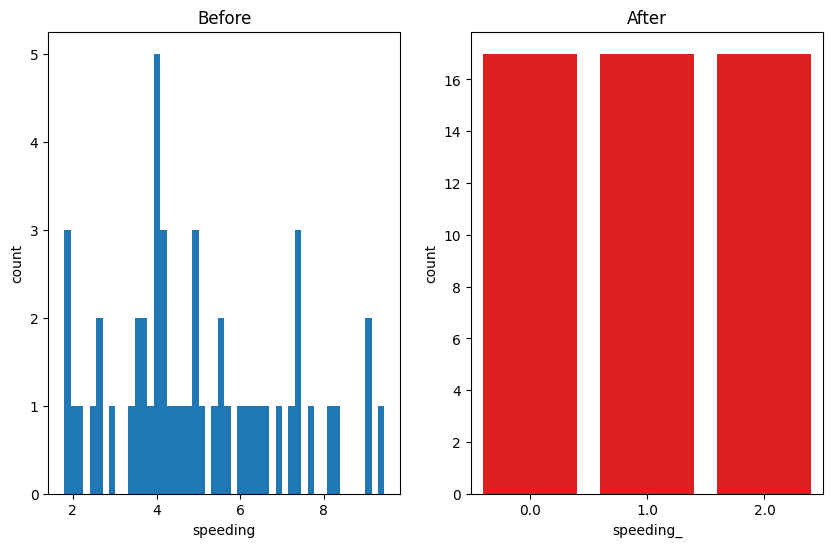

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

desc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile') 
# it will divide the data into 3 bins based on quantiles and encode them as ordinal numbers (0, 1, 2)
desc.fit(data[['speeding']])
data['speeding_'] = desc.transform(data[['speeding']])

# what it will do -
# if the value of speeding is less than the 33rd percentile, it will be categorized as 0
# if the value of speeding is less than the 66th percentile, it will be categorized as 1
# otherwise, it will be categorized as 2

# visualise
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
data['speeding'].plot.hist(bins=50)
plt.title('Before')
plt.xlabel('speeding')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='speeding_', color='red')
plt.title('After')

### **Binarization**

c:\Users\SOUMYOJEET\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'After')

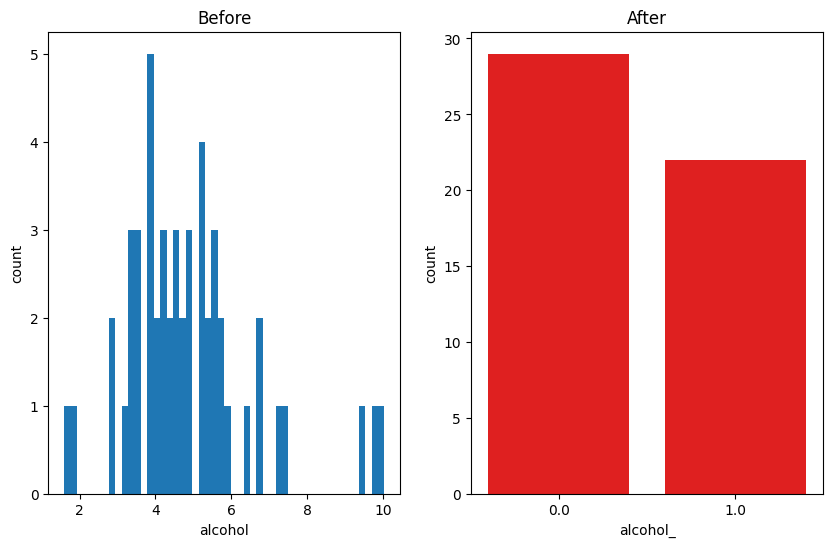

In [40]:
from sklearn.preprocessing import Binarizer

bin = Binarizer(threshold=data['alcohol'].mean())
data['alcohol_'] = bin.transform(data[['alcohol']])


# visualise
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
data['alcohol'].plot.hist(bins=50)
plt.title('Before')
plt.xlabel('alcohol')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='alcohol_', color='red')
plt.title('After')

# this alcohol col before binarization basically told 